IMPORTING THE REQUIRED 

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import keras 

LOADING AND SPLITTING THE DATA 

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
print(X_train[0].shape)

(32, 32, 3)


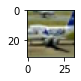

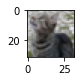

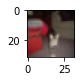

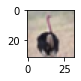

In [6]:

for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 

In [7]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [8]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 484s 1s/step - loss: 1.5963 - accuracy: 0.4139 - val_loss: 1.1354 - val_accuracy: 0.5906
Epoch 2/10
391/391 [==============================] - 481s 1s/step - loss: 1.1085 - accuracy: 0.6060 - val_loss: 0.9137 - val_accuracy: 0.6825
Epoch 3/10
391/391 [==============================] - 481s 1s/step - loss: 0.9273 - accuracy: 0.6742 - val_loss: 0.8169 - val_accuracy: 0.7181
Epoch 4/10
391/391 [==============================] - 480s 1s/step - loss: 0.8117 - accuracy: 0.7162 - val_loss: 0.7491 - val_accuracy: 0.7412
Epoch 5/10
391/391 [==============================] - 480s 1s/step - loss: 0.7333 - accuracy: 0.7414 - val_loss: 0.7557 - val_accuracy: 0.7372
Epoch 6/10
391/391 [==============================] - 481s 1s/step - loss: 0.6647 - accuracy: 0.7693 - val_loss: 0.6833 - val_accuracy: 0.7646
Epoch 7/10
391/391 [==============================] - 481s 1s/step - loss: 0.6120 - accuracy: 0.7850 - val_loss: 0.6602 - val_accuracy: 0.7724

PREDICTING 

In [9]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 127ms/step


In [10]:
print (predictions)

[[6.32349838e-05 1.96103383e-06 1.60797723e-02 9.09668859e-03
  4.97453094e-01 1.08843870e-01 1.95387605e-04 3.68222564e-01
  2.37535660e-05 1.98030411e-05]
 [9.18919177e-05 1.11299505e-05 9.51508526e-03 7.20463395e-02
  1.23487115e-01 2.93751448e-01 1.34863716e-03 4.99283850e-01
  5.51529520e-05 4.09297907e-04]
 [3.78438301e-07 6.85858936e-07 2.18820805e-03 1.18011434e-03
  6.60526799e-04 2.38664768e-04 9.95725870e-01 3.31795604e-06
  4.37751538e-07 1.86239060e-06]
 [1.38574563e-07 2.86476734e-07 9.37485529e-05 9.72863734e-01
  3.65625857e-03 4.40959400e-03 1.89414769e-02 9.01034218e-06
  5.83672772e-07 2.49957629e-05]
 [8.52386734e-07 9.99232531e-01 5.15110565e-10 1.19765016e-08
  5.60492278e-11 3.08756243e-10 3.92684246e-10 2.30630182e-10
  6.48228888e-06 7.60157476e-04]
 [4.95157201e-06 9.99268353e-01 2.68467204e-08 3.76557210e-07
  5.87410010e-10 3.49341427e-08 7.11040755e-08 6.68607780e-10
  3.48549103e-04 3.77717399e-04]
 [1.71447527e-02 5.01194084e-03 6.47246689e-02 2.22625509e

In [11]:
for image in predictions:
    print(np.sum(image))

1.0000001
0.9999999
1.0000001
0.9999998
1.0
1.0000001
0.99999994
1.0
1.0


In [12]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 7 6 3 1 1 5 6 8]


FINAL OBJECT DETECTION 

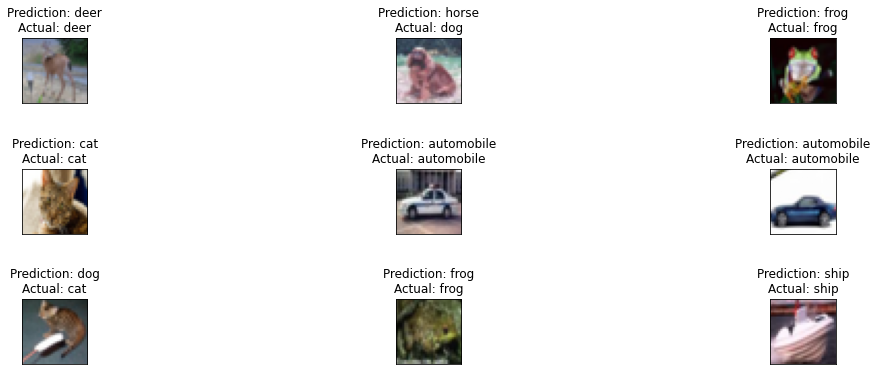

In [13]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()